## Task
* Setting up Environement
* Import data
* .head(), .info(), .describe(), .shape()
* seperate column, ie. num_cols, categorical_cols, time_series etc (only if available)
* seperate continuous and discrete data (if available)
* seperate norminal and ordinal data (if available )
* perform univariate analysis

# Setting Up Environment


In [60]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.ensemble import IsolationForest



### Loading data

In [61]:
df = pd.read_csv("../data/raw/creditcard.csv", nrows=10000) # Loading a subset of data for EDA
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    10000 non-null  int64  
 1   V1      10000 non-null  float64
 2   V2      10000 non-null  float64
 3   V3      10000 non-null  float64
 4   V4      10000 non-null  float64
 5   V5      10000 non-null  float64
 6   V6      10000 non-null  float64
 7   V7      10000 non-null  float64
 8   V8      10000 non-null  float64
 9   V9      10000 non-null  float64
 10  V10     10000 non-null  float64
 11  V11     10000 non-null  float64
 12  V12     10000 non-null  float64
 13  V13     10000 non-null  float64
 14  V14     10000 non-null  float64
 15  V15     10000 non-null  float64
 16  V16     10000 non-null  float64
 17  V17     10000 non-null  float64
 18  V18     10000 non-null  float64
 19  V19     10000 non-null  float64
 20  V20     10000 non-null  float64
 21  V21     10000 non-null  float64
 22 

In [63]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000
mean,5966.033400,-0.241862,0.281949,0.906270,0.264148,-0.046398,0.133108,-0.071689,-0.064778,0.802224,...,-0.051990,-0.152671,-0.033268,0.021335,0.087146,0.108140,0.005518,0.002915,63.030188,0.00380
std,4473.403739,1.521679,1.308139,1.159154,1.441235,1.182935,1.307311,1.077430,1.259064,1.155198,...,0.913811,0.631083,0.487814,0.594430,0.428171,0.562793,0.410868,0.266247,184.486158,0.06153
min,0.000000,-27.670569,-34.607649,-15.496222,-4.657545,-32.092129,-23.496714,-26.548144,-23.632502,-6.329801,...,-11.468435,-8.527145,-15.144340,-2.512377,-2.577363,-1.338556,-7.976100,-3.509250,0.000000,0.00000
25%,2072.750000,-1.013283,-0.208342,0.412799,-0.614424,-0.643390,-0.629934,-0.542336,-0.190747,0.070868,...,-0.268120,-0.549638,-0.174120,-0.327817,-0.158137,-0.327974,-0.084489,-0.015753,5.000000,0.00000
50%,4563.500000,-0.372799,0.288524,0.944361,0.219861,-0.152769,-0.152566,-0.055585,0.012865,0.805275,...,-0.123273,-0.136746,-0.045794,0.079976,0.121001,0.042865,-0.004568,0.015897,15.950000,0.00000
75%,10233.250000,1.150864,0.901879,1.602903,1.125666,0.371081,0.505357,0.476280,0.274533,1.506299,...,0.032707,0.247490,0.081665,0.410877,0.359058,0.476394,0.120811,0.077182,50.960000,0.00000
max,15012.000000,1.960497,8.636214,4.101716,10.463020,34.099309,21.393069,34.303177,5.060381,10.392889,...,22.588989,4.534454,13.876221,3.200201,5.525093,3.517346,8.254376,4.860769,7712.430000,1.00000


### Seperating numerical and categoricla columns

In [64]:
#seperating numerical and categoricla columns
num_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

print("Numerical Columns:", num_cols)
print("Categorical Columns:", categorical_cols)

Numerical Columns: ['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'Class']
Categorical Columns: []


### Seperating continous and discrete data

In [65]:
#seperating continous and discrete data
continuous_cols = []
discrete_cols = []
for col in num_cols:
    unique_values = df[col].nunique()
    if unique_values < 20:
        discrete_cols.append(col)
    else:
        continuous_cols.append(col)
        
print("Continuous Columns:", continuous_cols)
print("Discrete Columns:", discrete_cols)

Continuous Columns: ['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount']
Discrete Columns: ['Class']


### Checking for missing values

In [66]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

### performing univariate analysis

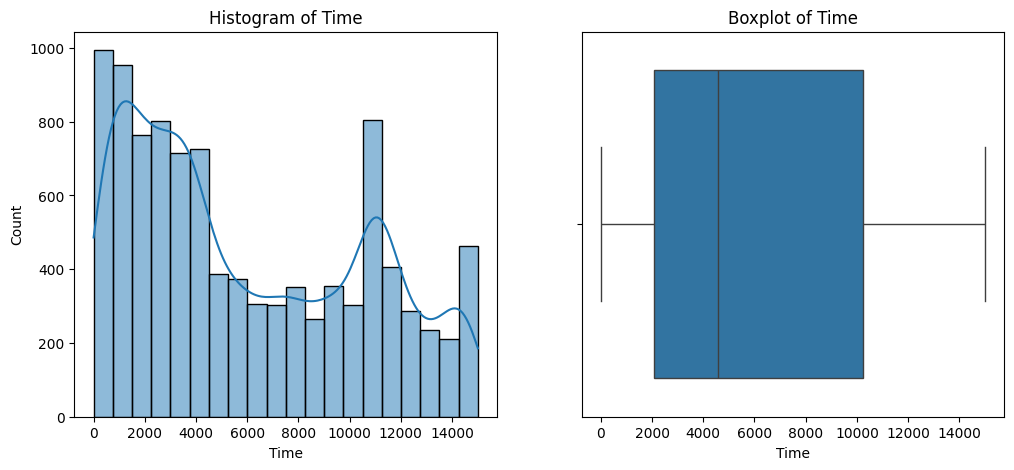

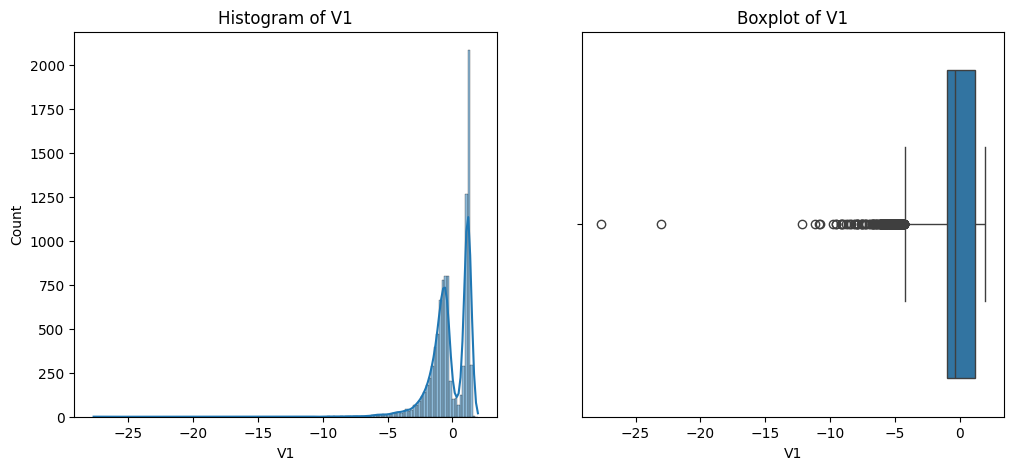

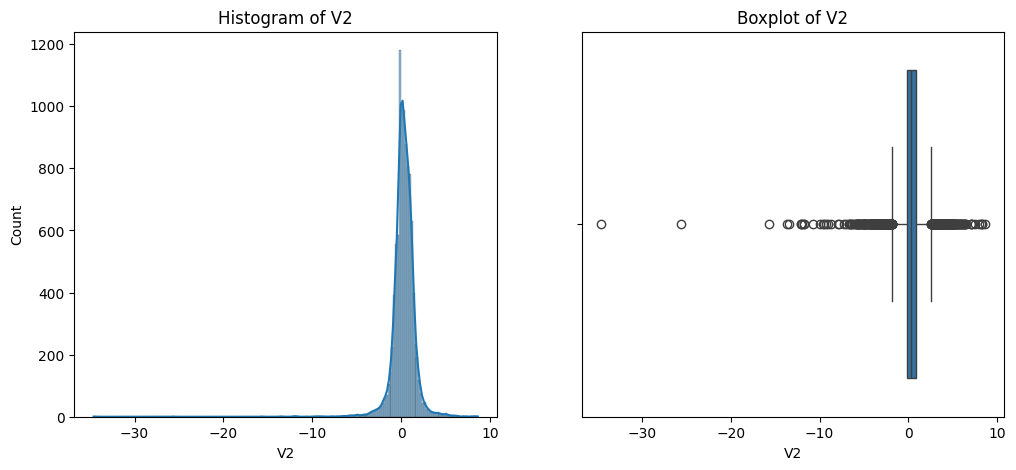

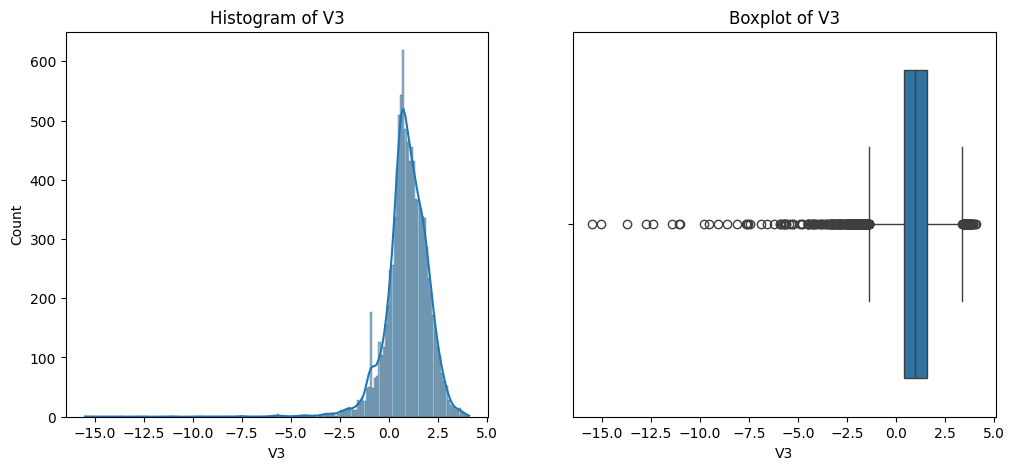

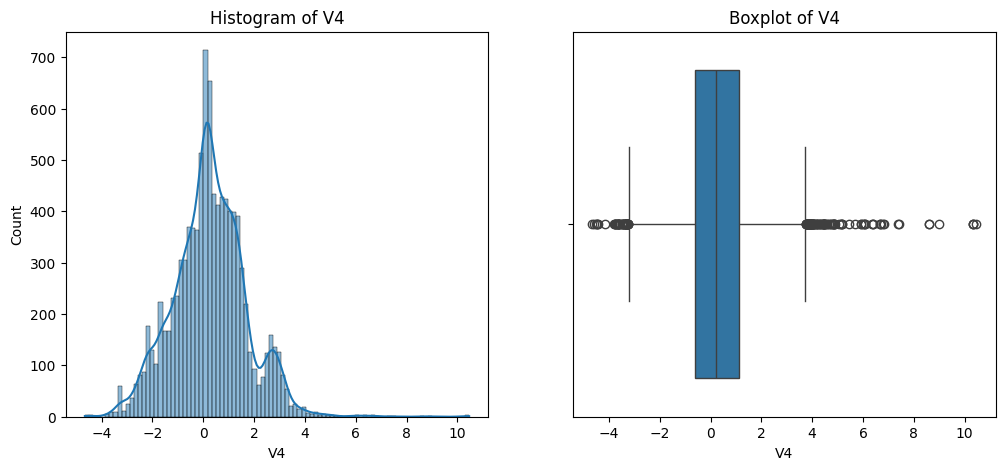

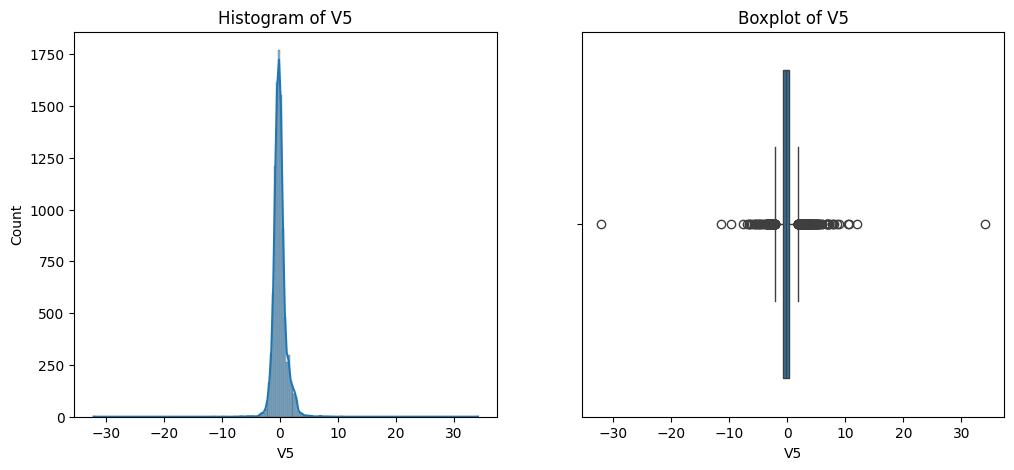

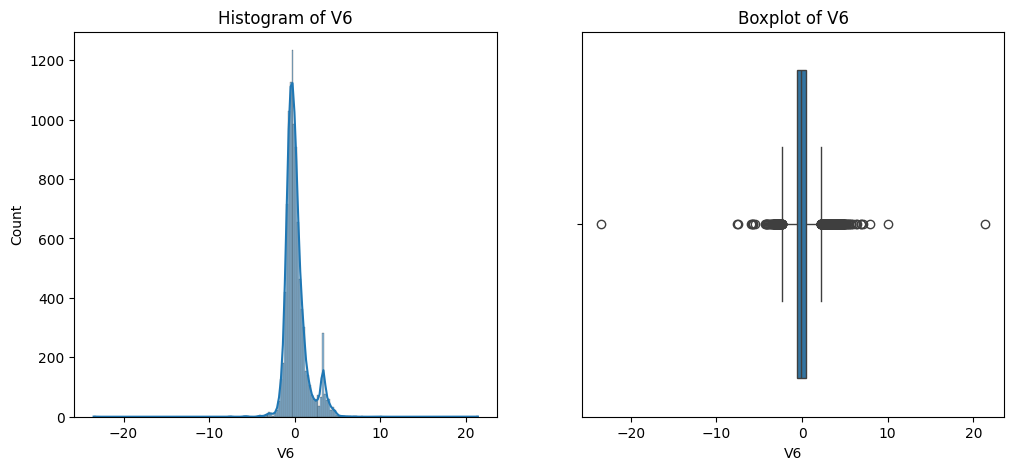

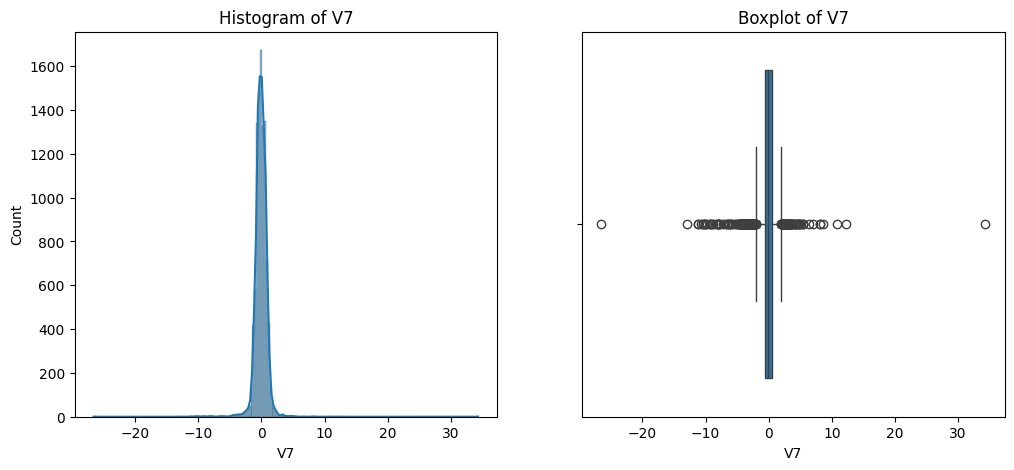

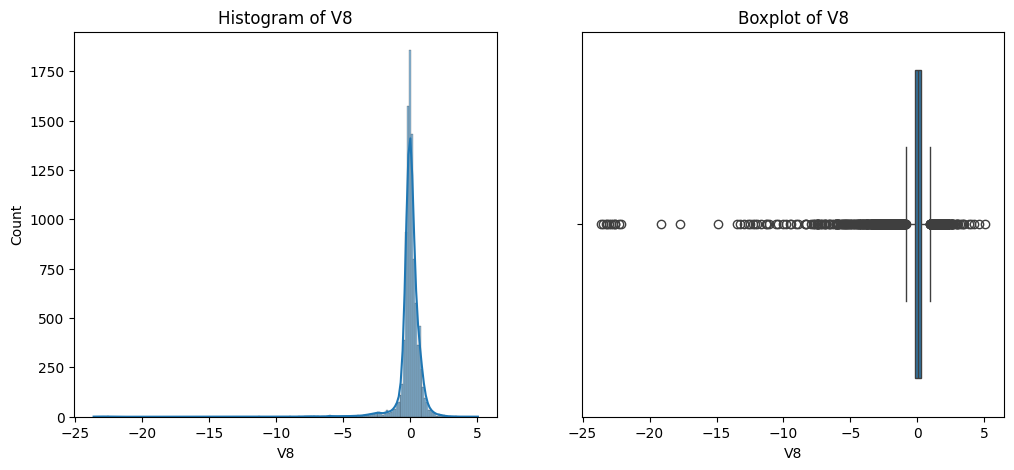

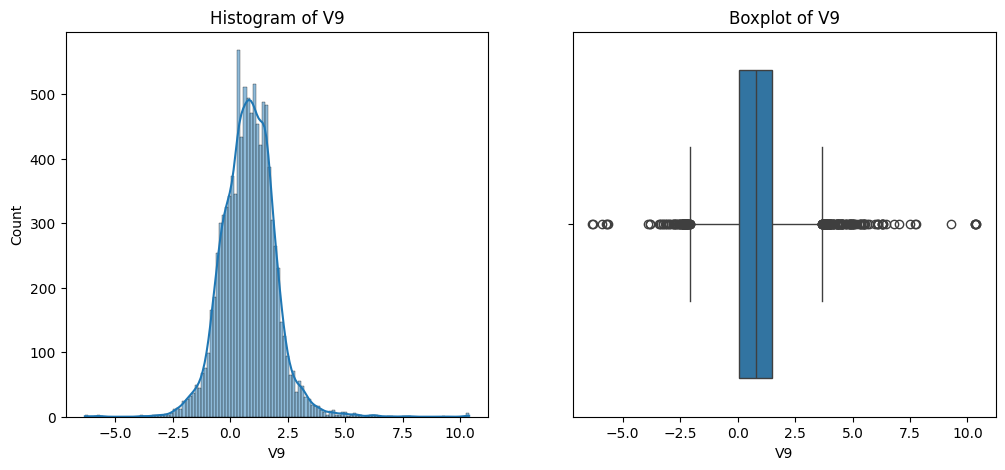

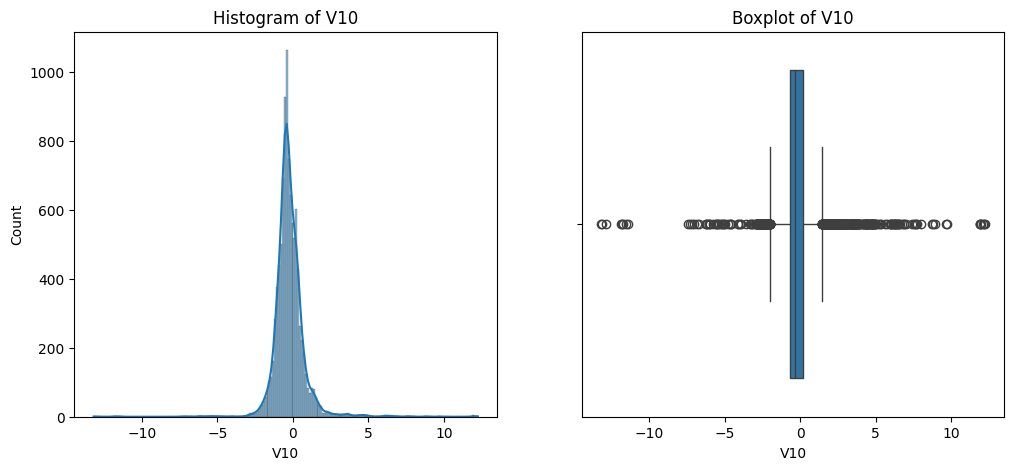

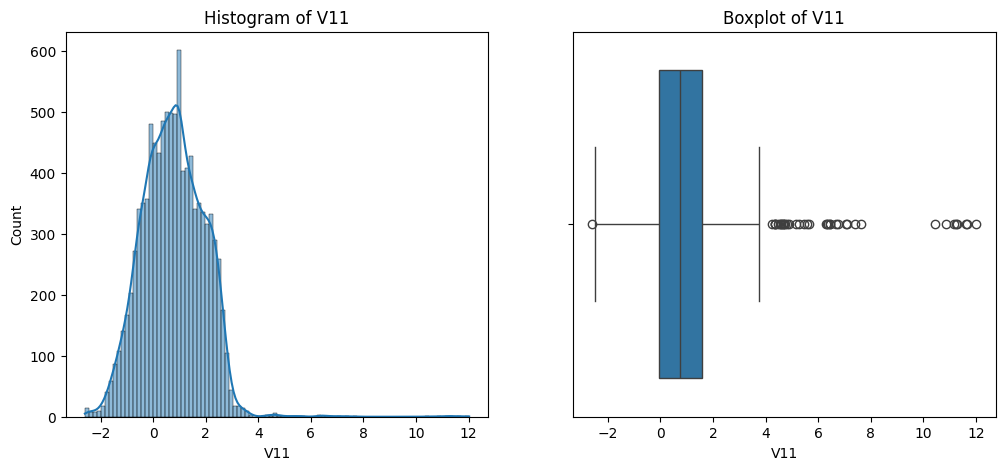

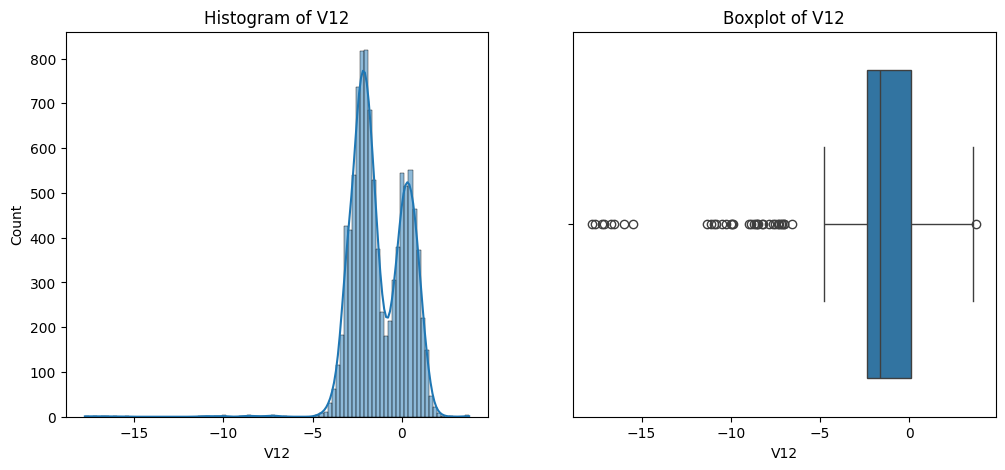

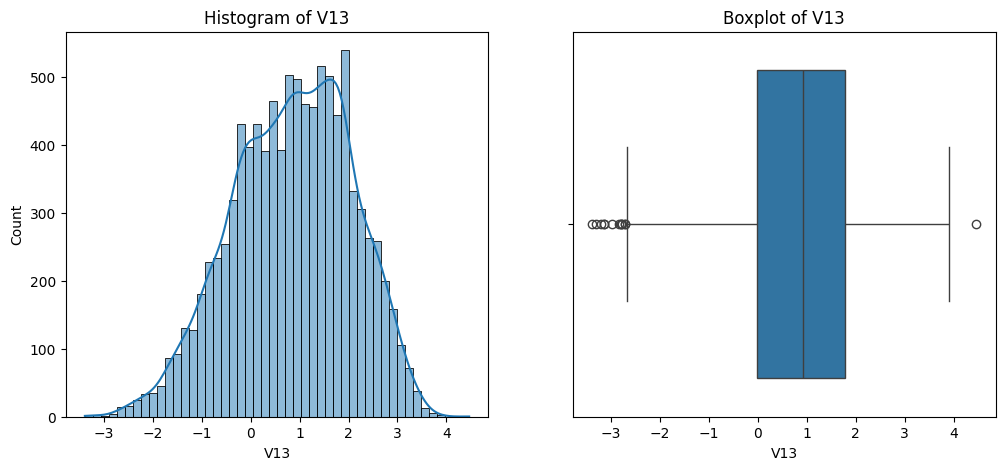

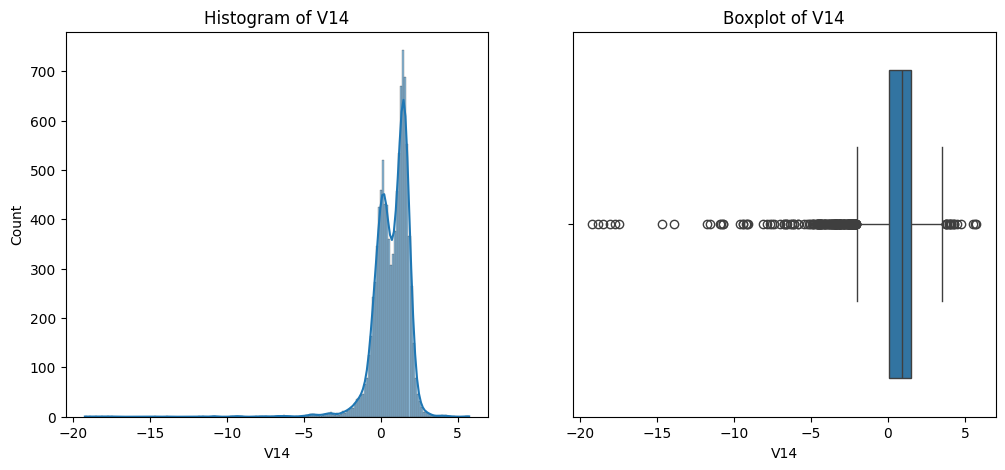

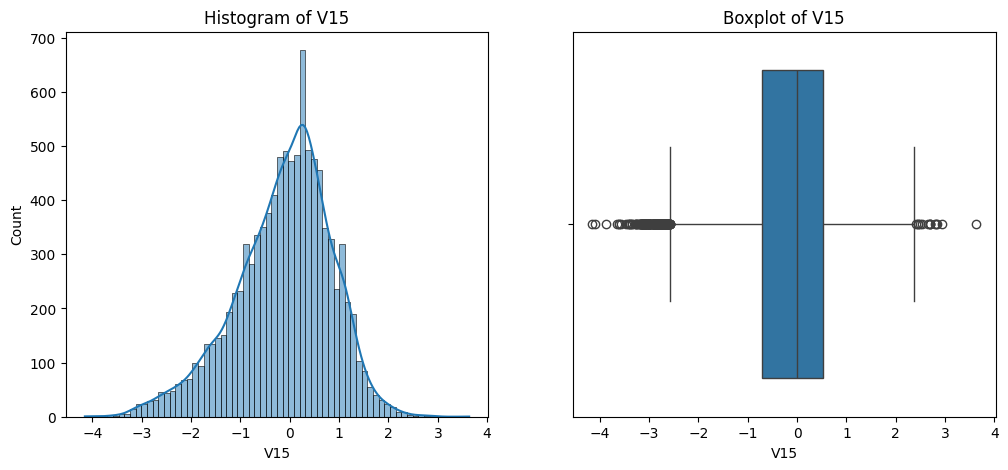

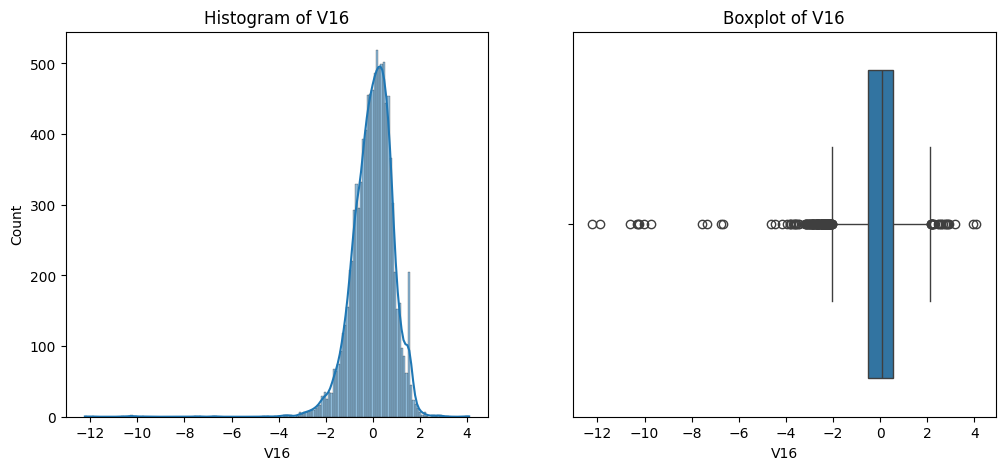

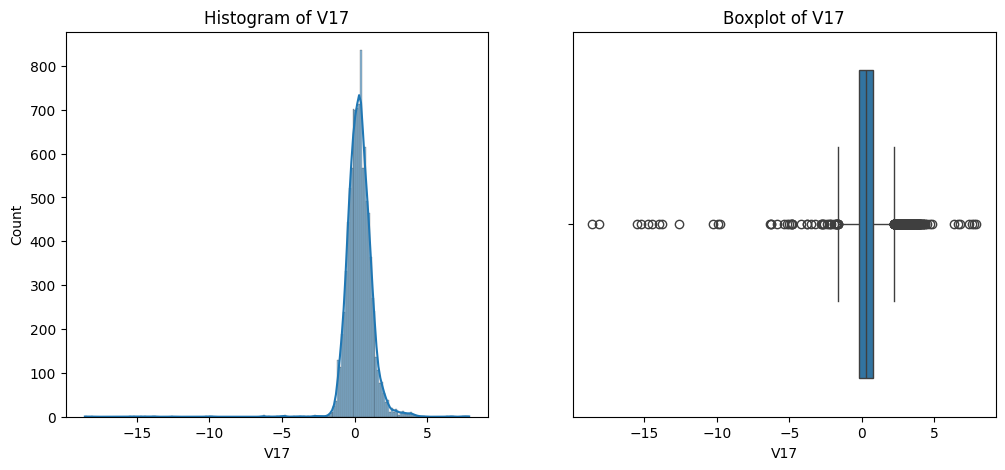

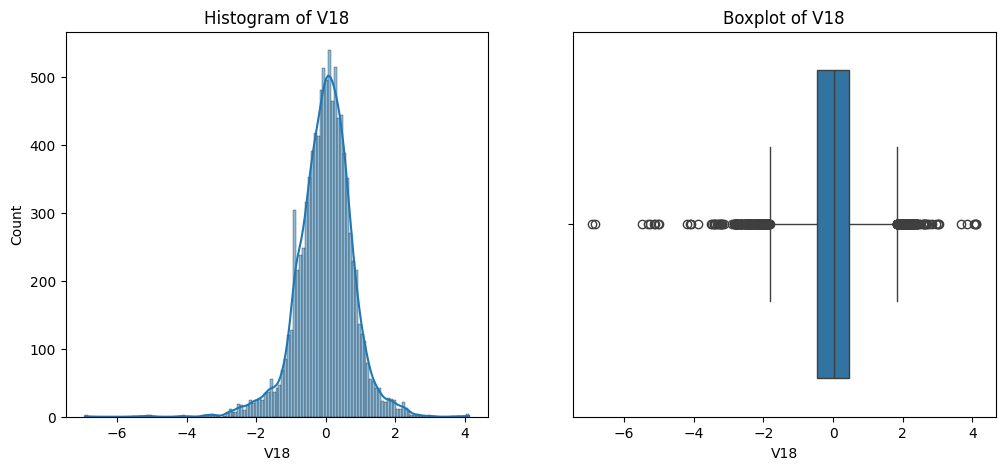

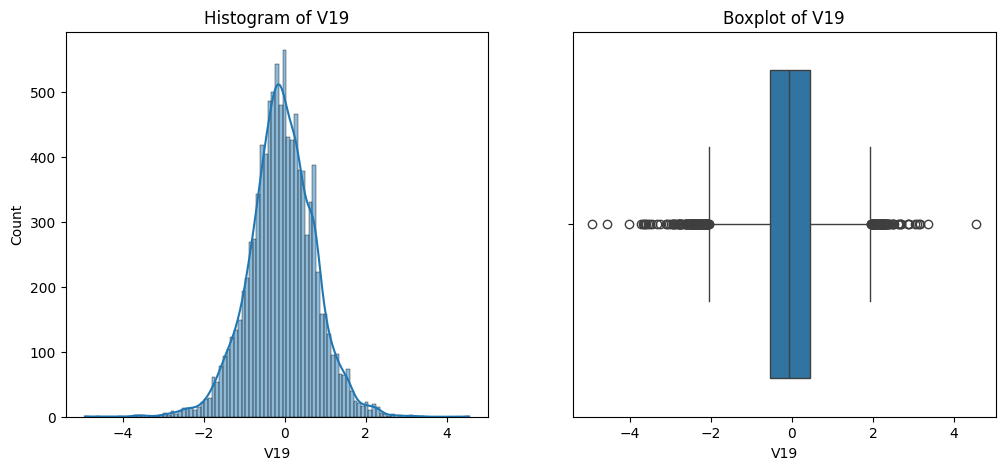

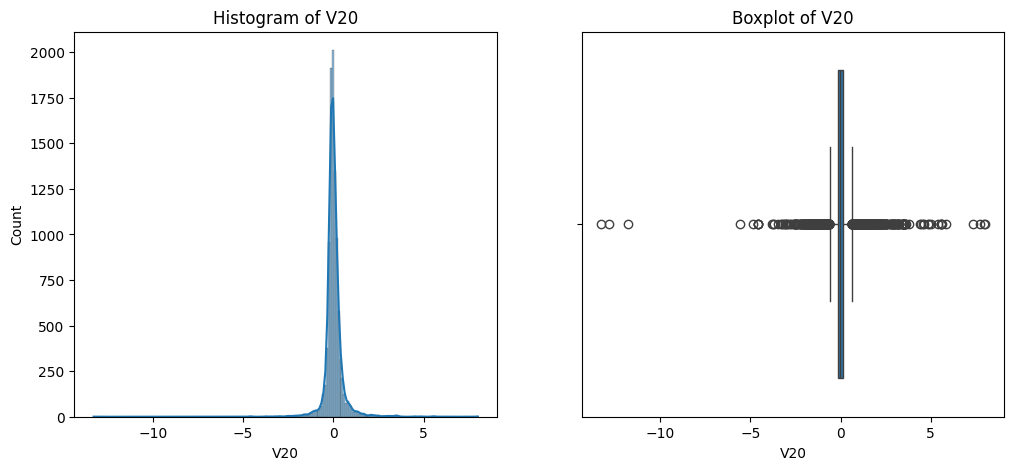

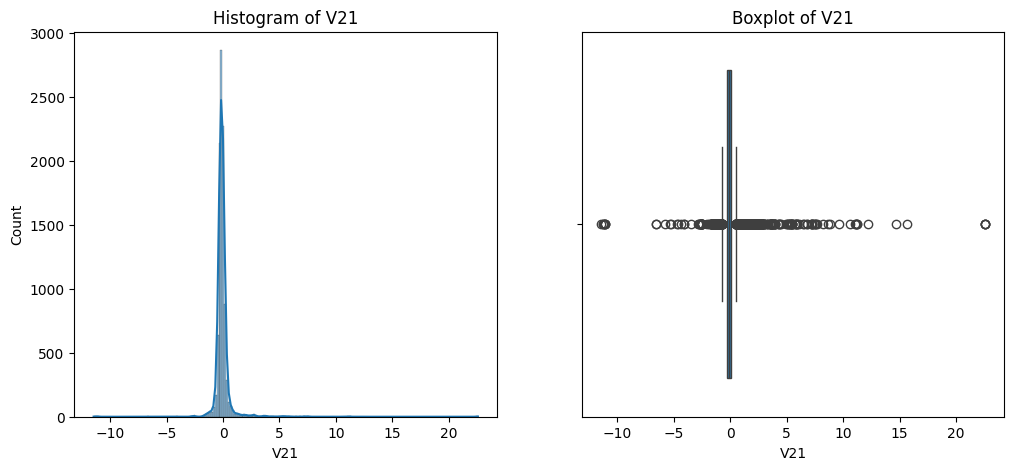

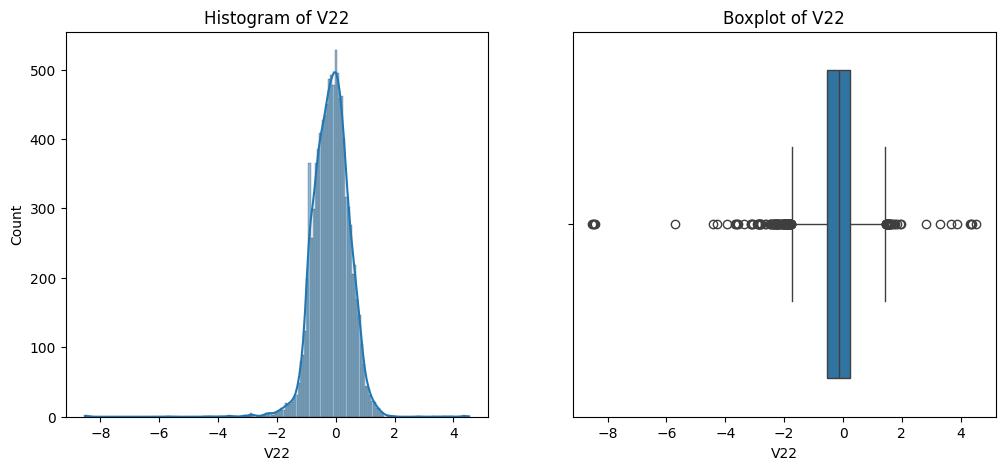

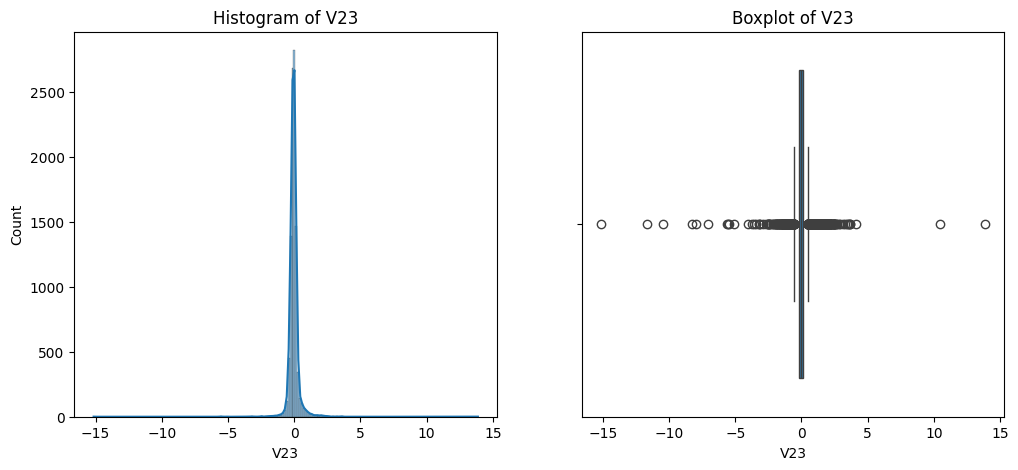

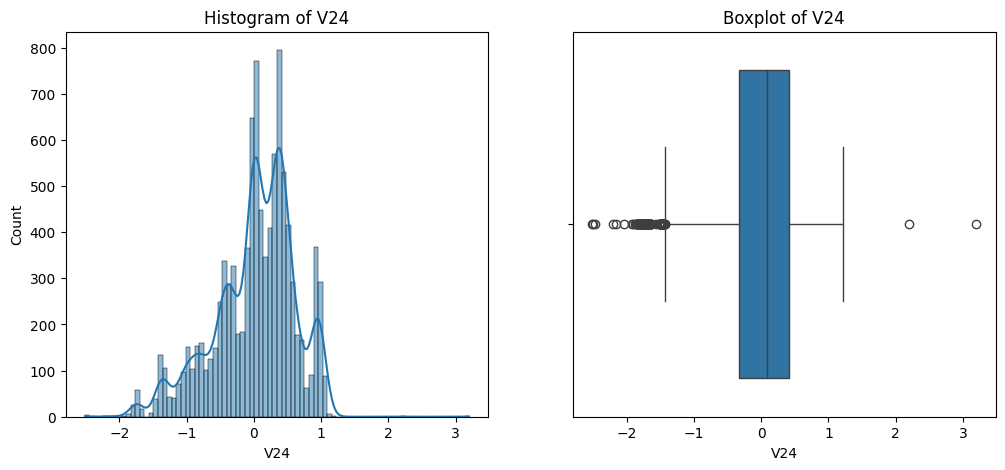

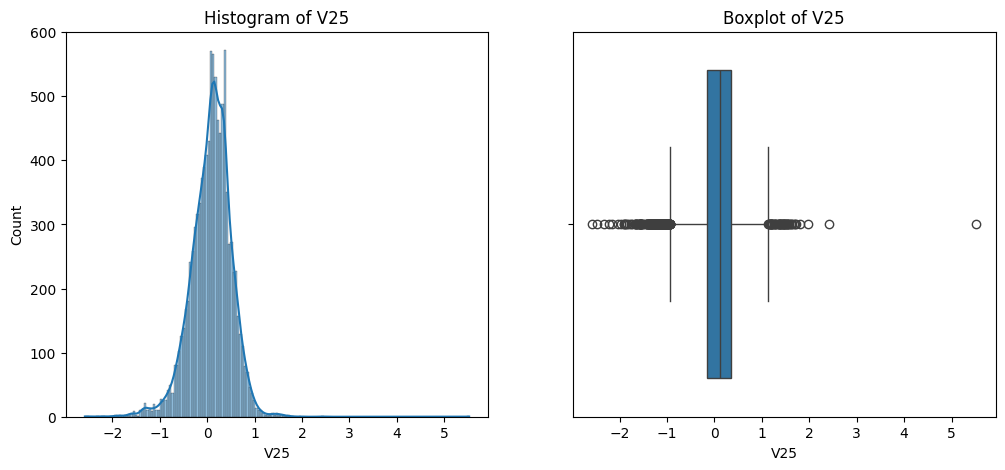

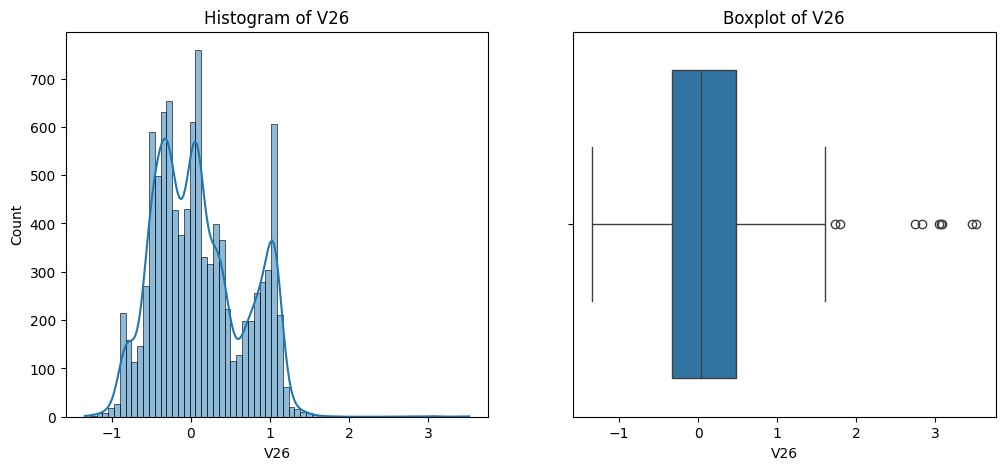

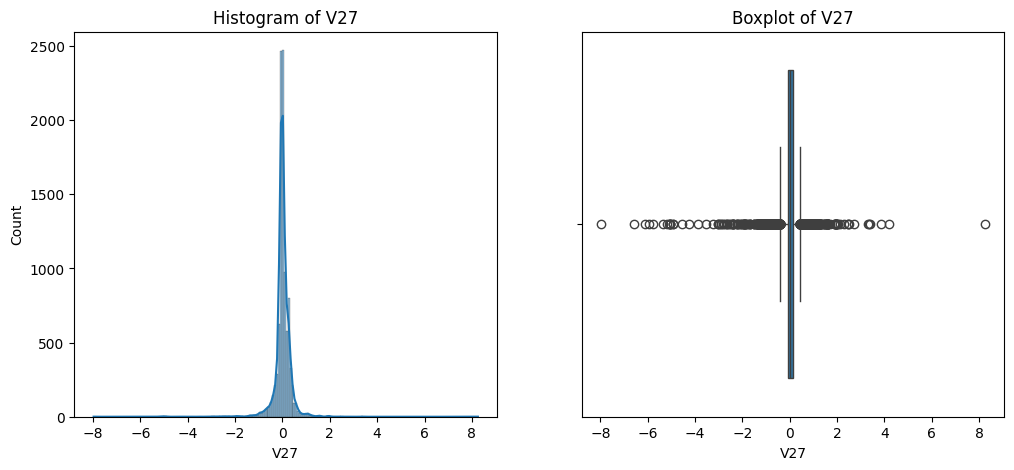

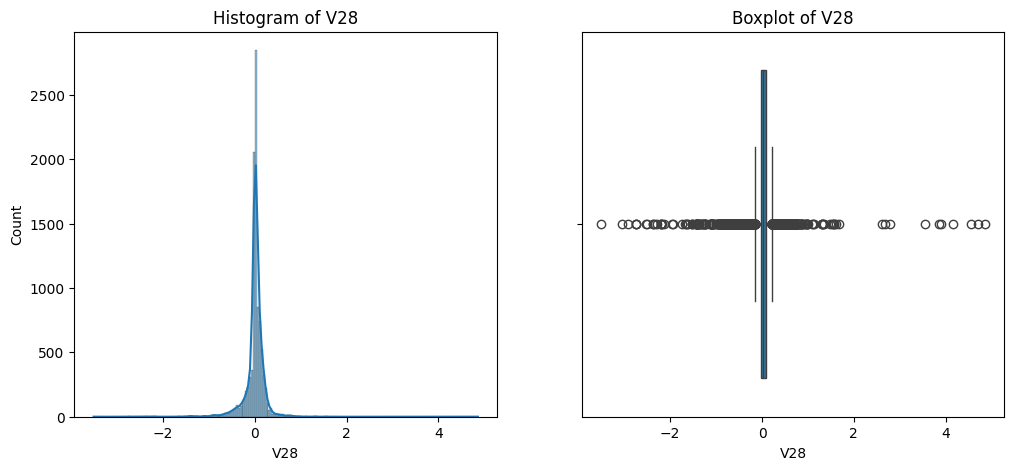

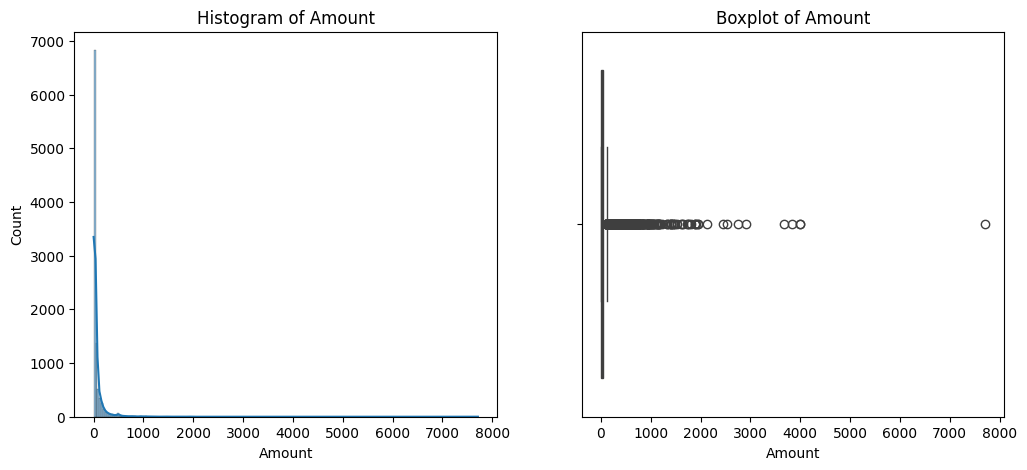

In [67]:
# performing univariate analysis in continuous_cols:

for col in continuous_cols:
    plt.figure(figsize=(12, 5))
    
    plt.subplot(1, 2, 1)
    sns.histplot(df[col], kde=True)
    plt.title(f'Histogram of {col}')
    
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    
    plt.show()

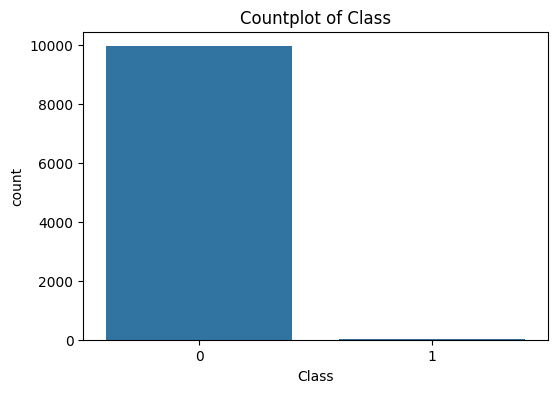

In [68]:
# performing univariate analysis in discrete_cols:
for col in discrete_cols:
    plt.figure(figsize=(6, 4))
    sns.countplot(x=df[col])
    plt.title(f'Countplot of {col}')
    plt.show()

`Interpetation`: After above univariate analysis, we can find many columns contains outliers. We can also see the given data is imbalanced dataset for predicting fradualient transaction. Some of the columns are either left skewed or right skewed, and few got high kurtosis. 

## Checking Correlation between data

Text(0.5, 1.0, 'Correlation Matrix')

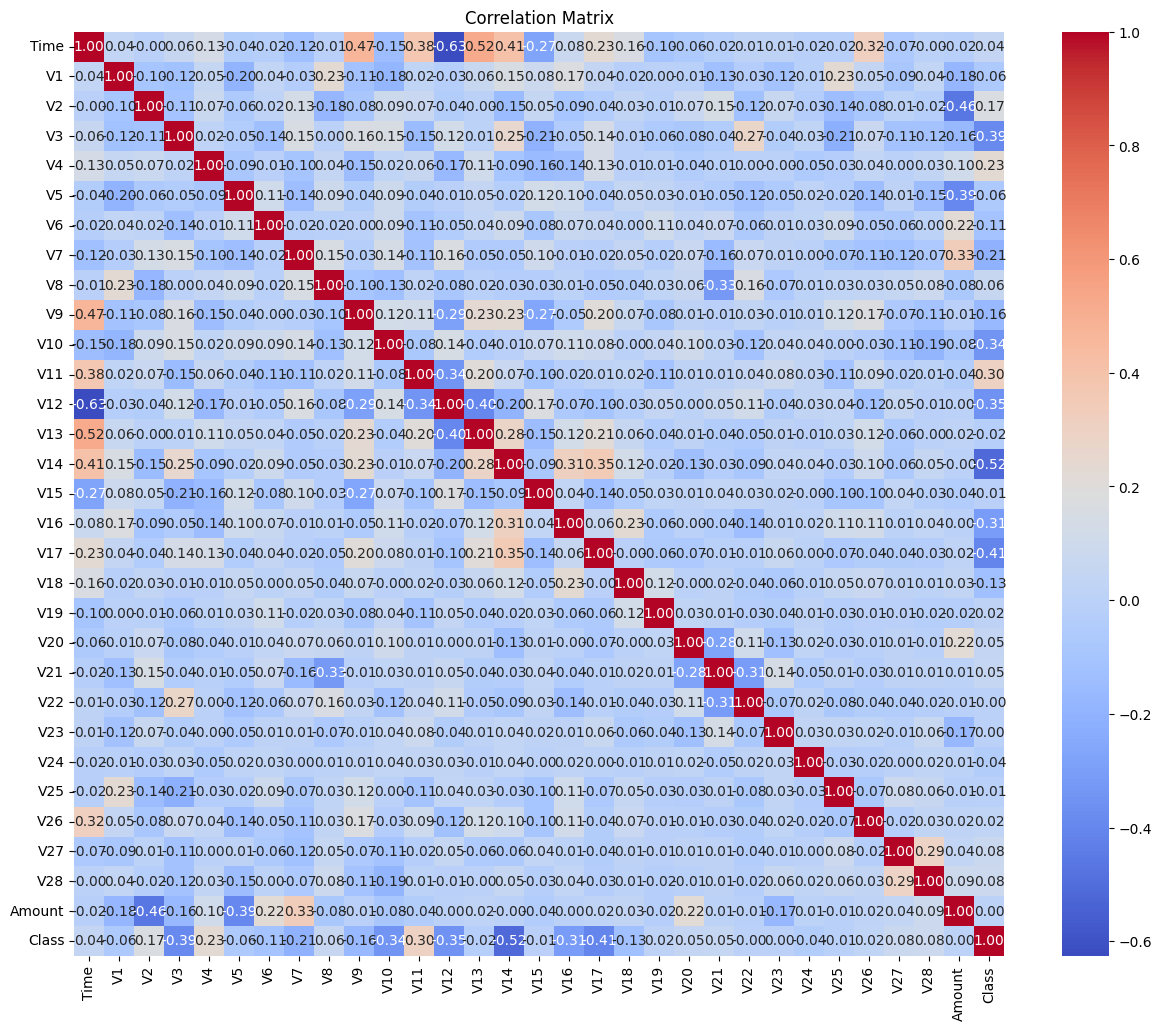

In [69]:
corr = df.corr()
plt.figure(figsize=(15, 12))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')

### Outlier Detection
To detect outlier, we have many methods. However, best method depends upon the data structure, dimensonality and data nature (skewed or normal distribution). Also depend upon correlation between columns. 

In our Case:
We have high-dimensionality of data (more feature == high dimensionality) and uncorrelated data. So, it would be better to use `Isolation Forest`

`Note`:
We don't have to detecte outliers in this dataset as it has been preprocessed using PCA technique.
However, if needed, below is the code to detect and remove outliers using Isolation Forest.


In [70]:
# # Outlier Detection using Isolation Forest
# iso_forest = IsolationForest(n_estimators=150, contamination='auto', random_state=42)
# outliers = iso_forest.fit_predict(df[continuous_cols])
# df['Outlier'] = outliers
# print("Number of outliers detected:", sum(df['Outlier'] == -1))

# # calculating outliers percentage
# outlier_percentage = (sum(df['Outlier'] == -1) / len(df)) * 100
# print(f"Percentage of outliers in the dataset: {outlier_percentage:.2f}%")  

# # Flagging outliers 
# # df['Outlier_Flag'] = df['Outlier'].apply(lambda x: 'Outlier' if x == -1 else 'Inlier')

# # Removing outliers
# df_cleaned = df[df['Outlier'] == 1].drop(columns=['Outlier'])
# # print("Data shape after removing outliers:", df_cleaned.shape)


In [71]:
# comparing before and after outlier removal for continuous columns
# for col in continuous_cols:
#     plt.figure(figsize=(12, 5))
    
#     plt.subplot(1, 2, 1)
#     sns.histplot(x=df[col])
#     plt.title(f'Boxplot of {col} (Before Outlier Removal)')
    
#     plt.subplot(1, 2, 2)
#     sns.histplot(x=df_cleaned[col])
#     plt.title(f'Boxplot of {col} (After Outlier Removal)')
    
#     plt.show()

`Interpretation`: After treating outlier, number of outliers are decreased. However, we can still see outlier in boxplot. This might be becaus boxplot works differently and the outlier detected might not be actual outlier. 

In [72]:
# df['outlier_flag'] = iso_forest.fit_predict(df[continuous_cols])
# plt.figure(figsize=(8,6))
# sns.scatterplot(
#     data=df,
#     x='V10', y='V12',
#     hue='outlier_flag',
#     style='Class',
#     palette={1: 'blue', -1: 'red'}
# )
# plt.title('Outliers vs True Class (V1 vs V2)')
# plt.show()

In [73]:
# pd.crosstab(df['Class'], df['outlier_flag'], normalize='index')
